In [33]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import os

# Ruta del archivo ZIP ya descomprimido
ruta_extraccion = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022'

# Listar los archivos extraídos para verificar la estructura
for root, dirs, files in os.walk(ruta_extraccion):
    for name in files:
        print(os.path.join(root, name))


C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico_VigilanciaClima_2022.zip
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Normales_Climatologico_VigilanciaClima_2022.zip


In [56]:
import zipfile
import os

# Rutas a los archivos ZIP que ya has encontrado
mensuales_zip_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico_VigilanciaClima_2022.zip'
normales_zip_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Normales_Climatologico_VigilanciaClima_2022.zip'

# Rutas donde se van a descomprimir los archivos
mensuales_extract_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico'
normales_extract_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Normales_Climatologico'

# Descomprimir Mensuales
with zipfile.ZipFile(mensuales_zip_path, 'r') as zip_ref:
    zip_ref.extractall(mensuales_extract_path)

# Descomprimir Normales
with zipfile.ZipFile(normales_zip_path, 'r') as zip_ref:
    zip_ref.extractall(normales_extract_path)

# Listar los archivos descomprimidos
print("Archivos en Mensuales Climatologico:")
for root, dirs, files in os.walk(mensuales_extract_path):
    for name in files:
        print(os.path.join(root, name))

print("\nArchivos en Normales Climatologico:")
for root, dirs, files in os.walk(normales_extract_path):
    for name in files:
        print(os.path.join(root, name))


Archivos en Mensuales Climatologico:
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_2022_ComunidadesAutonomas.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_2022_Nacional.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_2022_Provincias.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_Porcentaje_2022_ComunidadesAutonomas.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_Porcentaje_2022_Nacional.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_Porcentaje_2022_Provincias.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\TMAX_2022_ComunidadesAutonomas.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\TMAX_2022_Nacional.csv
C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\TMAX_2022_Provincias.c

### 2a: Determinación del tipo de serie temporal ###
Prueba de ADF para Temperatura Media en Baleares:
Estadístico ADF: -5.014042312280401
p-valor: 2.0815950386971588e-05

Prueba de ADF para Precipitación en Baleares:
Estadístico ADF: -2.276260768062148
p-valor: 0.17973867769959462



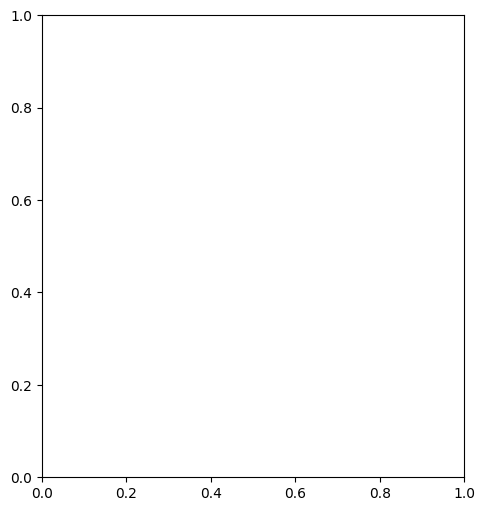

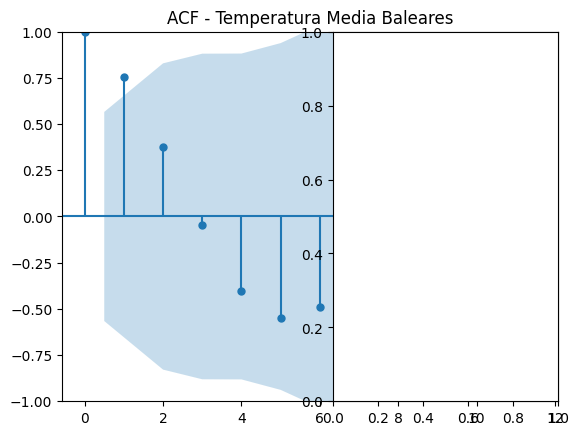

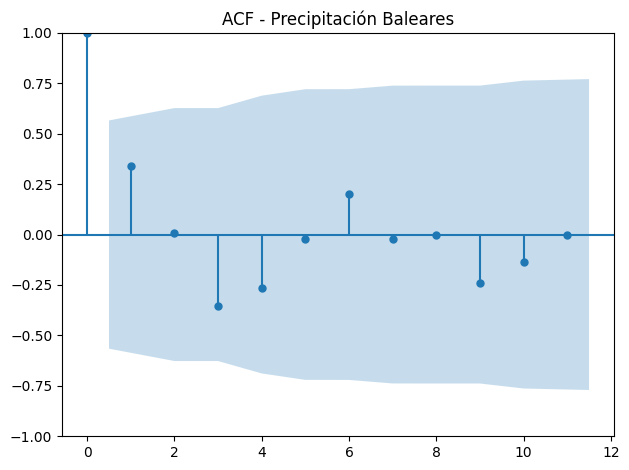

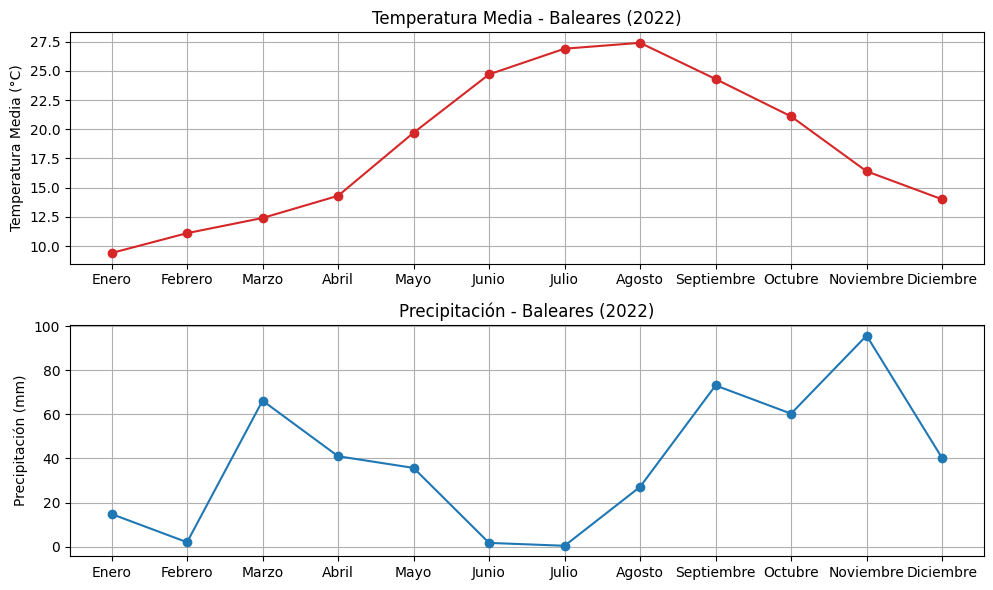

In [57]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import os

# Rutas a los archivos descomprimidos
tmed_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\TMED_2022_ComunidadesAutonomas.csv'
prec_path = r'C:\Users\nazar\Downloads\evc_estadistica_anual_2022\Mensuales_Climatologico\PREC_2022_ComunidadesAutonomas.csv'

# Leer los archivos en DataFrames
df_tmed = pd.read_csv(tmed_path, encoding='ISO-8859-1', sep=';')
df_prec = pd.read_csv(prec_path, encoding='ISO-8859-1', sep=';')

# Filtrar los datos para la Comunidad Autónoma de Baleares
baleares_tmed = df_tmed[df_tmed['región'] == 'COMUNIDAD AUTÓNOMA DE BALEARES'].iloc[:, 2:-1].values.flatten().astype(float)
baleares_prec = df_prec[df_prec['región'] == 'COMUNIDAD AUTÓNOMA DE BALEARES'].iloc[:, 2:-1].values.flatten().astype(float)

# 2a: Prueba de Dickey-Fuller Aumentada (ADF) y gráficos de autocorrelación
def adf_test(series, nombre_serie):
    result = adfuller(series)
    print(f"Prueba de ADF para {nombre_serie}:")
    print(f"Estadístico ADF: {result[0]}")
    print(f"p-valor: {result[1]}\n")

print("### 2a: Determinación del tipo de serie temporal ###")
adf_test(baleares_tmed, "Temperatura Media en Baleares")
adf_test(baleares_prec, "Precipitación en Baleares")

# Graficar autocorrelación (ACF) para temperatura media y precipitación
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(baleares_tmed, lags=11, title='ACF - Temperatura Media Baleares')
plt.subplot(1, 2, 2)
plot_acf(baleares_prec, lags=11, title='ACF - Precipitación Baleares')

plt.tight_layout()
plt.show()

# 2b: Representación gráfica de la serie temporal
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(10, 6))

# Gráfico de Temperatura Media
plt.subplot(2, 1, 1)
plt.plot(meses, baleares_tmed, marker='o', color='tab:red')
plt.title('Temperatura Media - Baleares (2022)')
plt.ylabel('Temperatura Media (°C)')
plt.grid(True)

# Gráfico de Precipitación
plt.subplot(2, 1, 2)
plt.plot(meses, baleares_prec, marker='o', color='tab:blue')
plt.title('Precipitación - Baleares (2022)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)

plt.tight_layout()
plt.show()


Código para realizar el Contraste de Kruskal-Wallis:


Contraste de Kruskal-Wallis para la Temperatura Media:
Estadístico H: 11.0, p-valor: 0.4432632784264654

Contraste de Kruskal-Wallis para la Precipitación:
Estadístico H: 11.0, p-valor: 0.4432632784264654


C:\Users\nazar\AppData\Local\Temp\ipykernel_3552\90241189.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([baleares_tmed[i::12] for i in range(12)], labels=meses)
C:\Users\nazar\AppData\Local\Temp\ipykernel_3552\90241189.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([baleares_prec[i::12] for i in range(12)], labels=meses)


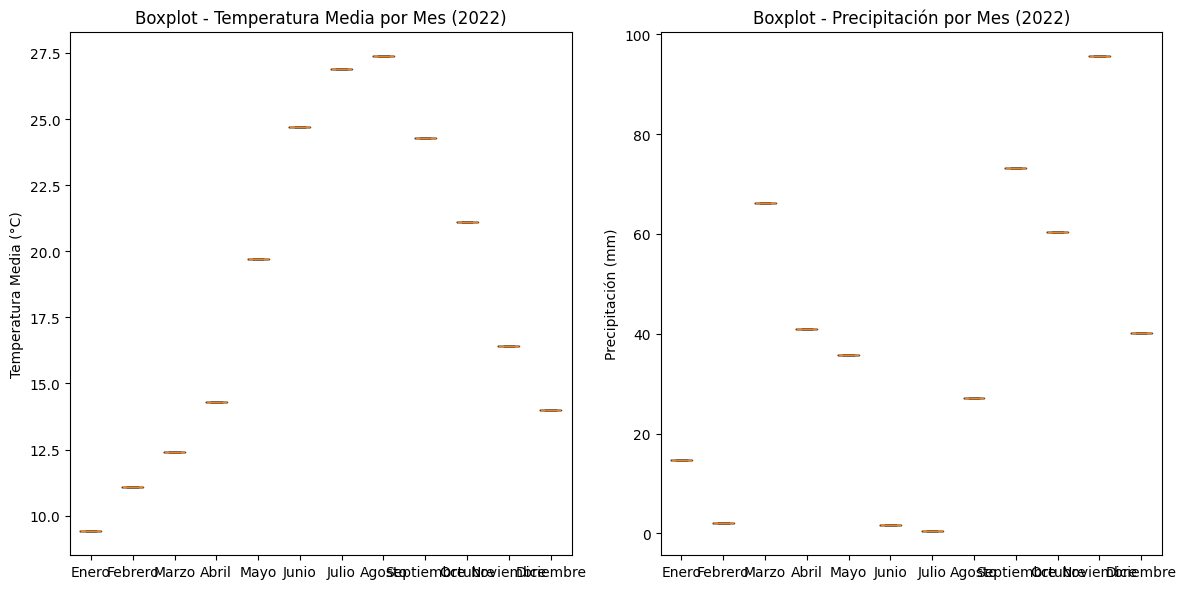

In [58]:
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Definir los meses para el análisis
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contraste de Kruskal-Wallis para la temperatura media
print("Contraste de Kruskal-Wallis para la Temperatura Media:")
kw_test_temp = kruskal(*[baleares_tmed[i::12] for i in range(12)])  # Dividir por meses
print(f"Estadístico H: {kw_test_temp.statistic}, p-valor: {kw_test_temp.pvalue}")

# Contraste de Kruskal-Wallis para la precipitación
print("\nContraste de Kruskal-Wallis para la Precipitación:")
kw_test_prec = kruskal(*[baleares_prec[i::12] for i in range(12)])  # Dividir por meses
print(f"Estadístico H: {kw_test_prec.statistic}, p-valor: {kw_test_prec.pvalue}")

# Gráfico de caja (boxplot) para visualizar las diferencias entre meses en temperatura y precipitación
plt.figure(figsize=(12, 6))

# Gráfico de caja para la Temperatura Media
plt.subplot(1, 2, 1)
plt.boxplot([baleares_tmed[i::12] for i in range(12)], labels=meses)
plt.title('Boxplot - Temperatura Media por Mes (2022)')
plt.ylabel('Temperatura Media (°C)')

# Gráfico de caja para la Precipitación
plt.subplot(1, 2, 2)
plt.boxplot([baleares_prec[i::12] for i in range(12)], labels=meses)
plt.title('Boxplot - Precipitación por Mes (2022)')
plt.ylabel('Precipitación (mm)')

plt.tight_layout()
plt.show()


In [59]:
pip install scikit-posthocs


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import scikit_posthocs as sp
import numpy as np
from scipy.stats import kruskal

# Crear un DataFrame con los datos de temperatura y los meses
df_tmed = pd.DataFrame({
    'Mes': np.tile(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], len(baleares_tmed) // 12),
    'Temperatura Media': baleares_tmed
})

df_prec = pd.DataFrame({
    'Mes': np.tile(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], len(baleares_prec) // 12),
    'Precipitación': baleares_prec
})

# Realizar la prueba de Kruskal-Wallis nuevamente para asegurar que se justifica el post-hoc
print("Kruskal-Wallis para la Temperatura Media:")
kruskal_tmed = kruskal(*[df_tmed[df_tmed['Mes'] == mes]['Temperatura Media'] for mes in df_tmed['Mes'].unique()])
print(kruskal_tmed)

print("\nKruskal-Wallis para la Precipitación:")
kruskal_prec = kruskal(*[df_prec[df_prec['Mes'] == mes]['Precipitación'] for mes in df_prec['Mes'].unique()])
print(kruskal_prec)

# Si el Kruskal-Wallis fuera significativo, aplicaríamos el contraste de Dunn (en este caso continuamos)
# Prueba de Dunn para la Temperatura Media
print("\nContraste de Dunn para la Temperatura Media:")
dunn_temp = sp.posthoc_dunn(df_tmed, val_col='Temperatura Media', group_col='Mes', p_adjust='bonferroni')
print(dunn_temp)

# Prueba de Dunn para la Precipitación
print("\nContraste de Dunn para la Precipitación:")
dunn_prec = sp.posthoc_dunn(df_prec, val_col='Precipitación', group_col='Mes', p_adjust='bonferroni')
print(dunn_prec)


Kruskal-Wallis para la Temperatura Media:
KruskalResult(statistic=np.float64(11.0), pvalue=np.float64(0.4432632784264654))

Kruskal-Wallis para la Precipitación:
KruskalResult(statistic=np.float64(11.0), pvalue=np.float64(0.4432632784264654))

Contraste de Dunn para la Temperatura Media:
            Abril  Agosto  Diciembre  Enero  Febrero  Julio  Junio  Marzo  \
Abril         1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Agosto        1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Diciembre     1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Enero         1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Febrero       1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Julio         1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Junio         1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Marzo         1.0     1.0        1.0    1.0      1.0    1.0    1.0    1.0   
Mayo          1.0 

Código para determinar el esquema de integración:

In [61]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Función para determinar el esquema de integración
def determinar_integracion(serie, nombre_serie):
    # Prueba ADF inicial
    resultado_adf = adfuller(serie)
    adf_stat = resultado_adf[0]
    p_value = resultado_adf[1]
    
    print(f"\nPrueba ADF para {nombre_serie} - Original: p-valor = {p_value}")
    
    # Si la serie es estacionaria (p-valor < 0.05), el esquema de integración es d = 0
    if p_value < 0.05:
        print(f"La serie {nombre_serie} es estacionaria. Orden de integración: d = 0")
        return 0
    
    # Si no es estacionaria, aplicar la diferenciación
    diferencia = np.diff(serie)
    resultado_adf_dif = adfuller(diferencia)
    adf_stat_dif = resultado_adf_dif[0]
    p_value_dif = resultado_adf_dif[1]
    
    print(f"Prueba ADF para {nombre_serie} - Diferenciada: p-valor = {p_value_dif}")
    
    # Si la serie diferenciada es estacionaria, el esquema de integración es d = 1
    if p_value_dif < 0.05:
        print(f"La serie {nombre_serie} es estacionaria tras una diferenciación. Orden de integración: d = 1")
        return 1
    
    # Si no es estacionaria, se podría seguir diferenciando, pero generalmente d = 1 es suficiente en la mayoría de los casos.
    print(f"La serie {nombre_serie} no es estacionaria tras una diferenciación. Se recomienda mayor análisis.")
    return None

# Determinar el esquema de integración para Temperatura Media
orden_integracion_temp = determinar_integracion(baleares_tmed, "Temperatura Media")

# Determinar el esquema de integración para Precipitación
orden_integracion_prec = determinar_integracion(baleares_prec, "Precipitación")



Prueba ADF para Temperatura Media - Original: p-valor = 2.0815950386971588e-05
La serie Temperatura Media es estacionaria. Orden de integración: d = 0

Prueba ADF para Precipitación - Original: p-valor = 0.17973867769959462
Prueba ADF para Precipitación - Diferenciada: p-valor = 0.07337766744532168
La serie Precipitación no es estacionaria tras una diferenciación. Se recomienda mayor análisis.


Código para comparar los métodos

In [63]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Dividimos los datos en entrenamiento (train) y prueba (test)
train_size = int(len(baleares_tmed) * 0.7)
train_temp, test_temp = baleares_tmed[:train_size], baleares_tmed[train_size:]
train_prec, test_prec = baleares_prec[:train_size], baleares_prec[train_size:]

# 1. Modelo ARMA para Temperatura Media (porque es estacionaria)
arma_model = ARIMA(train_temp, order=(1, 0, 1))  # ARMA(p, q)
arma_fit = arma_model.fit()
arma_pred = arma_fit.forecast(steps=len(test_temp))

# 2. Modelo ARIMA para Precipitación (porque no es estacionaria)
arima_model = ARIMA(train_prec, order=(1, 1, 1))  # ARIMA(p, d, q) con d=1 para una diferenciación
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_prec))

# 3. Modelo de Suavizado Exponencial Simple (ETS) para Temperatura Media
ets_model_temp = ExponentialSmoothing(train_temp, trend='add')  # Sin estacionalidad debido a falta de ciclos completos
ets_fit_temp = ets_model_temp.fit()
ets_pred_temp = ets_fit_temp.forecast(steps=len(test_temp))

# 4. Modelo de Suavizado Exponencial Simple (ETS) para Precipitación
ets_model_prec = ExponentialSmoothing(train_prec, trend='add')  # Sin estacionalidad
ets_fit_prec = ets_model_prec.fit()
ets_pred_prec = ets_fit_prec.forecast(steps=len(test_prec))

# 5. Modelo de Regresión Lineal para Temperatura Media
X_train_temp = np.arange(len(train_temp)).reshape(-1, 1)
X_test_temp = np.arange(len(train_temp), len(train_temp) + len(test_temp)).reshape(-1, 1)
reg_model_temp = sm.OLS(train_temp, sm.add_constant(X_train_temp)).fit()
reg_pred_temp = reg_model_temp.predict(sm.add_constant(X_test_temp))

# 6. Modelo de Regresión Lineal para Precipitación
X_train_prec = np.arange(len(train_prec)).reshape(-1, 1)
X_test_prec = np.arange(len(train_prec), len(train_prec) + len(test_prec)).reshape(-1, 1)
reg_model_prec = sm.OLS(train_prec, sm.add_constant(X_train_prec)).fit()
reg_pred_prec = reg_model_prec.predict(sm.add_constant(X_test_prec))

# Evaluar el desempeño de cada modelo
def evaluar_modelo(test, pred, nombre):
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)
    print(f"{nombre} - MSE: {mse:.4f}, MAE: {mae:.4f}")
    return mse, mae

# Comparar resultados para la Temperatura Media
print("Comparación de modelos para la Temperatura Media:")
evaluar_modelo(test_temp, arma_pred, "ARMA")
evaluar_modelo(test_temp, ets_pred_temp, "ETS")
evaluar_modelo(test_temp, reg_pred_temp, "Regresión Lineal")

# Comparar resultados para la Precipitación
print("\nComparación de modelos para la Precipitación:")
evaluar_modelo(test_prec, arima_pred, "ARIMA")
evaluar_modelo(test_prec, ets_pred_prec, "ETS")
evaluar_modelo(test_prec, reg_pred_prec, "Regresión Lineal")

# AIC para los modelos ARMA y ARIMA
print(f"\nARMA AIC (Temperatura Media): {arma_fit.aic}")
print(f"ARIMA AIC (Precipitación): {arima_fit.aic}")


Comparación de modelos para la Temperatura Media:
ARMA - MSE: 57.0498, MAE: 6.8185
ETS - MSE: 268.5849, MAE: 14.8786
Regresión Lineal - MSE: 340.4618, MAE: 16.9518

Comparación de modelos para la Precipitación:
ARIMA - MSE: 2307.0351, MAE: 43.6264
ETS - MSE: 3124.5948, MAE: 52.3340
Regresión Lineal - MSE: 3124.5838, MAE: 52.3339

ARMA AIC (Temperatura Media): 44.29650588315537
ARIMA AIC (Precipitación): 71.73524238580762


Código para la predicción a un año (12 meses)

c:\Users\nazar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\nazar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


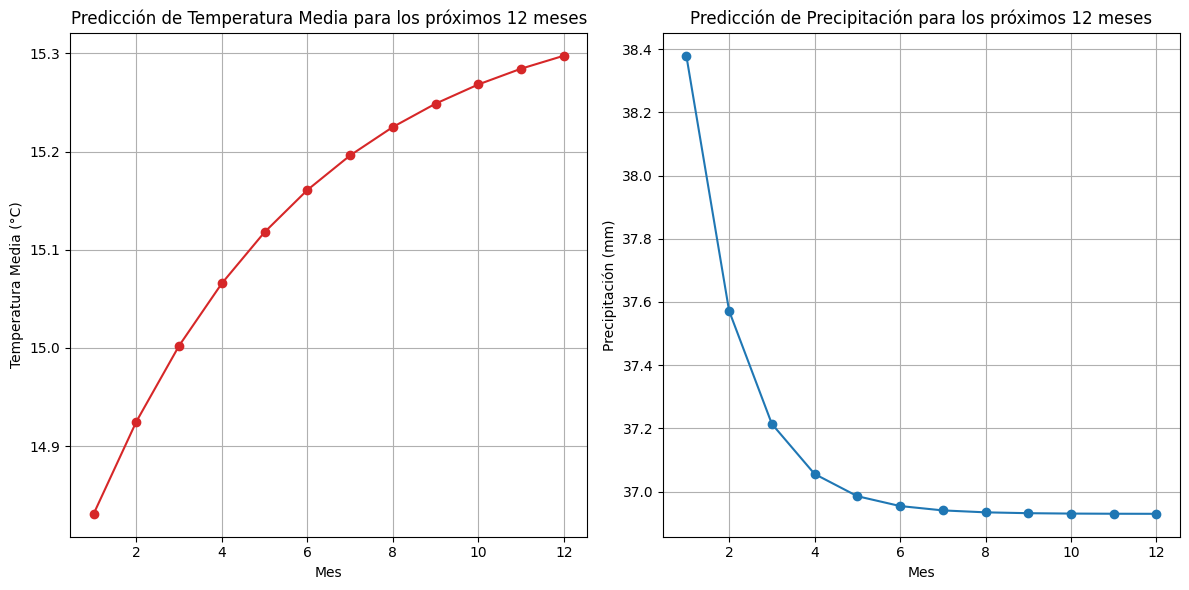

Predicción para los próximos 12 meses (Temperatura Media):
[14.83108661 14.92510456 15.00236117 15.06584462 15.11801035 15.16087607
 15.19609978 15.22504387 15.24882785 15.26837168 15.28443127 15.29762778]

Predicción para los próximos 12 meses (Precipitación):
[38.37915511 37.57201317 37.21422427 37.05562403 36.98531991 36.95415558
 36.9403411  36.93421743 36.93150294 36.93029966 36.92976627 36.92952983]


In [64]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Predicción para Temperatura Media (ARMA)
# Ajustamos el modelo ARMA nuevamente con todos los datos para hacer la predicción de 12 meses
arma_model_full = ARIMA(baleares_tmed, order=(1, 0, 1))
arma_fit_full = arma_model_full.fit()
arma_pred_12meses = arma_fit_full.forecast(steps=12)

# 2. Predicción para Precipitación (ARIMA)
# Ajustamos el modelo ARIMA con todos los datos para hacer la predicción de 12 meses
arima_model_full = ARIMA(baleares_prec, order=(1, 1, 1))
arima_fit_full = arima_model_full.fit()
arima_pred_12meses = arima_fit_full.forecast(steps=12)

# Crear una serie de meses para los próximos 12 meses
meses_pred = np.arange(1, 13)

# 3. Graficar las predicciones
plt.figure(figsize=(12, 6))

# Gráfico para Temperatura Media
plt.subplot(1, 2, 1)
plt.plot(meses_pred, arma_pred_12meses, marker='o', color='tab:red')
plt.title('Predicción de Temperatura Media para los próximos 12 meses')
plt.xlabel('Mes')
plt.ylabel('Temperatura Media (°C)')
plt.grid(True)

# Gráfico para Precipitación
plt.subplot(1, 2, 2)
plt.plot(meses_pred, arima_pred_12meses, marker='o', color='tab:blue')
plt.title('Predicción de Precipitación para los próximos 12 meses')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir los valores predichos
print("Predicción para los próximos 12 meses (Temperatura Media):")
print(arma_pred_12meses)

print("\nPredicción para los próximos 12 meses (Precipitación):")
print(arima_pred_12meses)
